[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 4)]


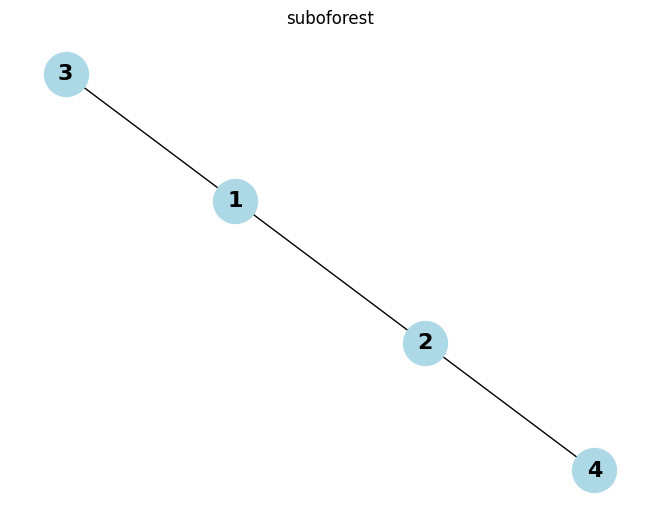

In [55]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def random_subgraph(T):
    subgraph = nx.Graph()
    for node in T.nodes():
        if random.random() > 0.5:
            subgraph.add_node(node)
            for neighbor in T.neighbors(node):
                if random.random() > 0.5 and T.has_edge(node, neighbor):
                    subgraph.add_edge(node,neighbor)
    return subgraph



def sadrzi_izomorfno(G, H):
    for h in H:
        gm = nx.algorithms.isomorphism.GraphMatcher(G, h)
        if gm.is_isomorphic():
            return True
    return False

def fitness(subgraph, H):
    if sadrzi_izomorfno(subgraph, H):
        return 0
    if len(subgraph.nodes()) == 0:
        return 0
        
    if not nx.is_connected(subgraph):
        return 0
    return subgraph.number_of_nodes()

def crossover(parent1, parent2):
    child = nx.Graph()
    for node in parent1.nodes():
        if node in parent2.nodes() and random.random() > 0.5:
            child.add_node(node)
            for neighbor in parent1.neighbors(node):
                if parent2.has_edge(node, neighbor):
                    child.add_edge(node, neighbor)
    return child

def mutation(subgraph, T):
    if random.random() > 0.5:
        node = random.choice(list(T.nodes()))
        subgraph.add_node(node)
        for neighbor in T.neighbors(node):
            if T.has_edge(node, neighbor) and random.random() > 0.5:
                subgraph.add_edge(node, neighbor)
    else:
        if subgraph.nodes():
            node = random.choice(list(subgraph.nodes()))
            subgraph.remove_node(node)
    return subgraph


def genetski(T, H, population_size = 50, generations = 100, mutation_rate = 0.1):

    population = [random_subgraph(T) for _ in range(population_size)]
    for generation in range(generations):
        population = sorted(population, key = lambda g: fitness(g, H), reverse=True)
        best_fitness = fitness(population[0], H)
        if best_fitness == T.number_of_nodes():
            break

        new_population = population[:population_size // 2]
        while len(new_population) < population_size:
            parent1 = random.choice(population[:10])
            parent2 = random.choice(population[:10])
            child = crossover(parent1, parent2)
            new_population.append(child)

        for i in range(1, population_size):
            if random.random() < mutation_rate:
                new_population[i] = mutation(new_population[i], T)

        population = new_population

    return population[0]



G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])

H = []
h1 = nx.Graph()
h1.add_edges_from([(1,2), (1,3)])
H.append(h1)


h2 = nx.Graph()
h2.add_edges_from([(1,2)])
H.append(h2)

h3 = nx.Graph()
h3.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])
H.append(h3)


h4 = nx.Graph()
h4.add_edges_from([(1,2), (1,3), (2,4), (3,5)])
H.append(h4)

h5 = nx.Graph()
h5.add_edges_from([(5, 3), (3, 1), (3, 6), (1, 2)])
H.append(h5)



best_subforest = genetski(G, H, population_size=50, generations = 100, mutation_rate = 0.1)
print(best_subforest.nodes())
print(best_subforest.edges())



nx.draw(best_subforest, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("suboforest")
plt.show()

